# z500_patterns

In [30]:
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
import matplotlib.colors as mc
#
import cartopy.crs as ccrs

In [2]:
# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False,'pcolor.shading':'auto'})

In [3]:
class Site:
    def DomeF(self):
        sx=14 ; sy=60 # 77°18′59″S 39°42′04″E
        df_lat = -77.3 ; df_lon=39.66
        
        return df_lon, df_lat, sx, sy

In [29]:
class draw_map:
    def label_h(self,fig,ax,barplot,cs,levels,label,fontsize):
        cbaCorrax = fig.add_axes(barplot)
        cbar      = plt.colorbar(cs, cax=cbaCorrax,orientation='horizontal',ticks=levels) 
        cbar.ax.tick_params(labelsize=fontsize) 
        cbar.set_label(label, size=fontsize)

In [36]:
class draw_Ant:
    def raw(self,ax,area,title,x,y,var0,norm,cmap,levels,fontsize=24,alpha=1):
        ax.set_boundary(draw_Ant().circle(), transform=ax.transAxes)
        ax.set_title(title, fontsize=fontsize) 
        
        cm = plt.get_cmap(cmap)
        cs = ax.contourf(x, y, var0, 
                             norm=norm, cmap=cmap, levels=levels, alpha=alpha,
                             transform=ccrs.PlateCarree(), extend = "both")
        df_lon, df_lat, sx, sy = Site().DomeF()
        ax.scatter(df_lon, df_lat, c="black", s=100, 
                       marker='^', edgecolors='white', linewidth=1, zorder=3,transform=ccrs.PlateCarree())
        ax.set_global()
        ax.coastlines()
        ax.set_extent(area, crs=ccrs.PlateCarree())
 
        return cs
    
    def circle(self):
        theta          = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts          = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle         = mpath.Path(verts * radius + center)
        
        return circle 

In [6]:
def Color_Set(levels, cmapname):
    cmap       = plt.get_cmap(cmapname, len(levels)+1)
    colors     = cmap(range(cmap.N))
    cmap, norm = mc.from_levels_and_colors(levels,colors,extend="both")
    
    return cmap, norm    

In [7]:
def get_color_code(cname,num):
    cmap = cm.get_cmap(cname,num)

    code_list =[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3]
        code_list.append(rgb2hex(rgb))

    return code_list

In [8]:
loadfile = "z500_anom.npz"
dataset  = np.load(loadfile)
z500     = dataset["z500"]
lon2     = dataset["lon2"]
lat2     = dataset["lat2"]
y        = dataset["y"]
m        = dataset["m"]
d        = dataset["d"]

In [9]:
loadfile   = "prcp_d18O_index.npz"
dataset    = np.load(loadfile)
d18O_index = dataset["index"]

In [10]:
dataset     = np.load("sam_pattern.npz")
sam_pattern = dataset["z500"]

In [11]:
thres=1

In [12]:
z500_p    = np.nanmean(z500[:,:, d18O_index>=   thres]                        ,2)
z500_n    = np.nanmean(z500[:,:, d18O_index<=-1*thres]                        ,2)
z500JJA_p = np.nanmean(z500[:,:,(d18O_index>=   thres)&((m==6)+(m==7)+(m==8))],2)
z500JJA_n = np.nanmean(z500[:,:,(d18O_index<=-1*thres)&((m==6)+(m==7)+(m==8))],2)

In [13]:
z500M2O_p  = np.nanmean(z500[:,:,(d18O_index>=   thres)&((m>=3)&(m<=10))               ],2)
z500M2O_n  = np.nanmean(z500[:,:,(d18O_index<=-1*thres)&((m>=3)&(m<=10))               ],2)
z500NDJF_p = np.nanmean(z500[:,:,(d18O_index>=   thres)&((m==11)+(m==12)+(m==1)+(m==2))],2)
z500NDJF_n = np.nanmean(z500[:,:,(d18O_index<=-1*thres)&((m==11)+(m==12)+(m==1)+(m==2))],2)

In [27]:
label_sam_p = "$\mathsf{SAM^+}$"
label_sam_m = "$\mathsf{SAM^-}$"
label_n     = "$\mathsf{\delta^-}$"
label_p     = "$\mathsf{\delta^+}$"

In [22]:
levels = [-10,-8,-6,-4,-2,-1,1,2,4,6,8,10]
cmapname = "coolwarm"
cmap, norm = Color_Set(levels, cmapname)
def draw_field5(var1,title1, var2, title2, var3, title3, var4, title4, var5, title5, 
                title="",label1="",
                levels1=levels, cmap1=cmap, norm1=norm, 
               area=[-180, 180, -90, -60]):
    # colorbar
    barplot=[0.05, 0.05, 0.9, 0.03]
    
    fig = plt.figure(figsize=(15,12))
    
    ax = plt.subplot2grid((2,3),(0,0),projection=ccrs.SouthPolarStereo())
    cs = draw_Ant().raw(ax,area,title,lon2,lat2,var1,norm1,cmap1,levels1,16)
    ax.set_title("(a)", loc="left", fontsize=20, weight="demibold")
    ax.set_title(title1 ,loc="center", fontsize=20)
    
    ax = plt.subplot2grid((2,3),(0,1),projection=ccrs.SouthPolarStereo())
    cs = draw_Ant().raw(ax,area,title,lon2,lat2,var2,norm1,cmap1,levels1,16)
    ax.set_title("(b)", loc="left", fontsize=20, weight="demibold")
    ax.set_title(title2 ,loc="center", fontsize=20)

    ax = plt.subplot2grid((2,3),(0,2),projection=ccrs.SouthPolarStereo())
    cs = draw_Ant().raw(ax,area,title,lon2,lat2,var3,norm1,cmap1,levels1,16)
    ax.set_title("(c)", loc="left", fontsize=20, weight="demibold")
    ax.set_title(title3 ,loc="center", fontsize=20)
    
    ax = plt.subplot2grid((2,3),(1,0),projection=ccrs.SouthPolarStereo())
    cs = draw_Ant().raw(ax,area,title,lon2,lat2,var4,norm1,cmap1,levels1,16)
    ax.set_title("(d)", loc="left", fontsize=20, weight="demibold")
    ax.set_title(title4 ,loc="center", fontsize=20)

    ax = plt.subplot2grid((2,3),(1,1),projection=ccrs.SouthPolarStereo())
    cs = draw_Ant().raw(ax,area,title,lon2,lat2,var5,norm1,cmap1,levels1,16)
    ax.set_title("(e)", loc="left", fontsize=20, weight="demibold")
    ax.set_title(title5 ,loc="center", fontsize=20)   
    
    draw_map().label_h(fig,ax,barplot, cs,levels1,label1,16)    
    
    return fig, ax

In [16]:
z500_levels          =  [-60,-40,-20,-10,10,20,40,60,80,100,120]
z500_cmapname        = "twilight_shifted"
z500_cmap, z500_norm = Color_Set(z500_levels, z500_cmapname)
z500_label           = "Geopotential height (500 hPa) [m]" 

color_code           = (get_color_code(z500_cmapname,len(z500_levels)+1)[:]) # Modification
mid                  = (len(color_code)-1)/2 -1
color_code[int(mid)] = "#ffffff"
z500_cmap, z500_norm = mc.from_levels_and_colors(z500_levels,color_code,extend="both")          

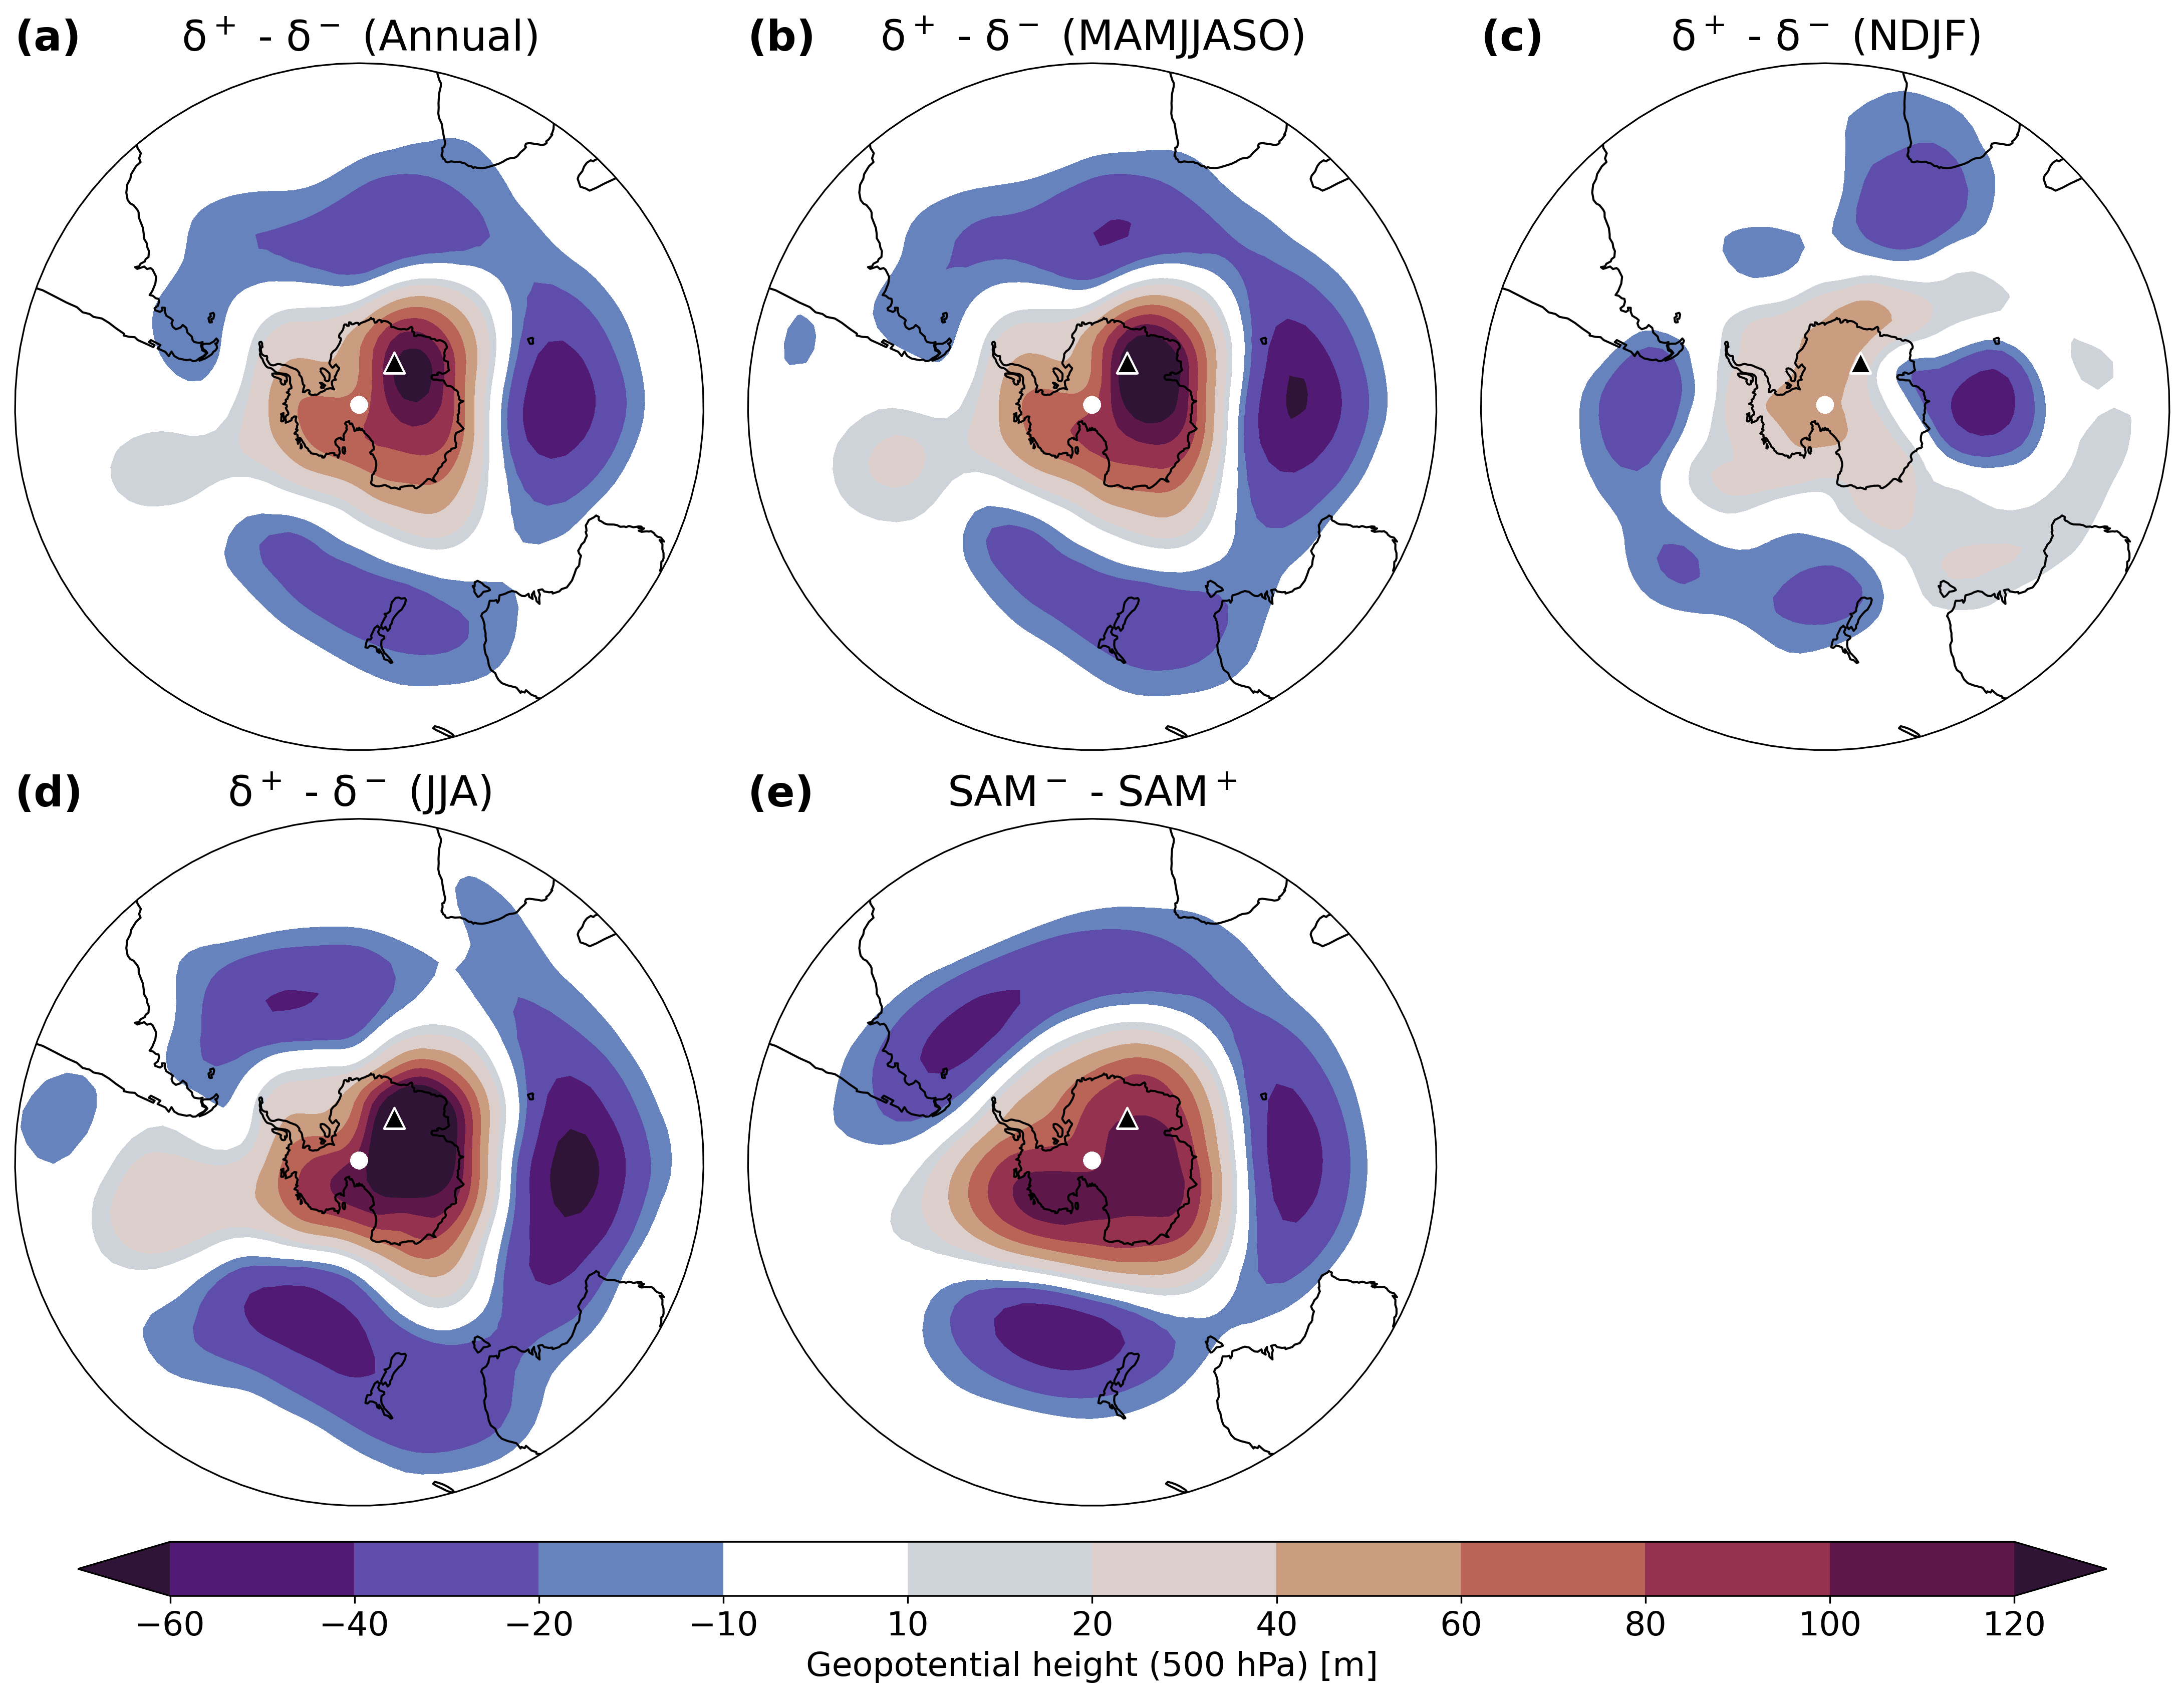

In [37]:
fig,ax = draw_field5(z500_p-z500_n         , label_p+" - "+label_n+" (Annual)"  ,
                     z500M2O_p-z500M2O_n   , label_p+" - "+label_n+" (MAMJJASO)",  
                     z500NDJF_p-z500NDJF_n , label_p+" - "+label_n+" (NDJF)"    ,
                     z500JJA_p-z500JJA_n   , label_p+" - "+label_n+" (JJA)"     ,
                     sam_pattern*-1*2      , label_sam_m+" - "+label_sam_p      ,
                     label1=z500_label, levels1=z500_levels, cmap1=z500_cmap, norm1=z500_norm,
                     area=[-180, 180, -90, -20])

plt.subplots_adjust(top=0.9,bottom=0.1,left=0.02,right=0.98,hspace=0.1,wspace=0.05)
fig.show()
fig.savefig("z500_patterns.png")             

Kanon Kino (kanon[at]aori.u-tokyo.ac.jp)